Dataset file is imported from Drive, for now.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset used in this notebook is the [Energy Efficiency Dataset](https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset) from Kaggle.

It was compiled by researchers at the University of Oxford, Angeliki Xifara and  Athanasios Tsanas.

It contains simulated building data for 12 buildings, resulting in 768 samples over 8 *input* features. The *output* features of interest are the amount of **energy** required to heat or cool the building.

### List of input features

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

### List of output featurees

y1 Heating Load

y2 Cooling Load

In [53]:
import pandas as pd

file_path = 'kaggle_energy_Dataset.csv'

df = pd.read_csv(file_path)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
X_train = train_df.drop(['Y1', 'Y2'], axis=1)
print(X_train[0:9])

       X1     X2     X3     X4   X5  X6    X7  X8
60   0.82  612.5  318.5  147.0  7.0   2  0.10   1
618  0.64  784.0  343.0  220.5  3.5   4  0.40   2
346  0.86  588.0  294.0  147.0  7.0   4  0.25   2
294  0.90  563.5  318.5  122.5  7.0   4  0.25   1
231  0.66  759.5  318.5  220.5  3.5   5  0.10   4
340  0.90  563.5  318.5  122.5  7.0   2  0.25   2
535  0.90  563.5  318.5  122.5  7.0   5  0.40   1
306  0.79  637.0  343.0  147.0  7.0   4  0.25   1
718  0.62  808.5  367.5  220.5  3.5   4  0.40   4


In [5]:
Y_train = train_df[['Y1', 'Y2']]
print(Y_train[0:2])

        Y1     Y2
60   23.53  27.31
618  18.90  22.09


In [6]:
print(X_train['X1'])
print(len(Y_train))

60     0.82
618    0.64
346    0.86
294    0.90
231    0.66
       ... 
71     0.76
106    0.86
270    0.71
435    0.98
102    0.90
Name: X1, Length: 614, dtype: float64
614


In [7]:
"""
Setting up test sets
"""
X_test = test_df.drop(['Y1', 'Y2'], axis=1)
Y_test = test_df[['Y1', 'Y2']]

In [8]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We will use scikit-learn to perform Gaussian Process (GP) regression on the data.

Then compute train & test accuracy.

Finally, we will benchmark this against a vanilla neural network made with PyTorch.

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
# Length Scale ~ Learning Rate
kernel = 1.0 * RBF(length_scale=1e-1) + WhiteKernel(noise_level=1.0)
gpr = GaussianProcessRegressor(
    kernel=kernel,
    random_state=0,
    optimizer='fmin_l_bfgs_b',
    n_restarts_optimizer=10,  # More restarts to avoid poor local minima
)
gpr.fit(X_train, Y_train)
gpr.score(X_train, Y_train)

0.9966286220771734

That above text showed that the GP regressor achieved an $R^2$ score of 0.9966 over the training set.

For the record, training took 1 minute on a CPU.

Below, you can see that the test set's $R^2$ score is also very high, at 0.989.

In [10]:
gpr.score(X_test, Y_test)

0.9893510317226546

Seems the model fit the training data really well!

Let's compare it on a plot.

In [11]:
print(X_test[0:9])

[[-1.34498313  1.52879024  1.12425064  0.95706259 -0.98384385 -1.36441084
   1.22779036  0.12918878]
 [-0.96525229  0.97253708 -0.00737214  0.95706259 -0.98384385 -1.36441084
   0.10874541 -1.1605984 ]
 [ 2.07259443 -1.80872872 -0.57318352 -1.49710347  1.01642146 -1.36441084
   1.22779036  0.12918878]
 [ 0.26887294 -0.41809582  0.55843925 -0.67904812  1.01642146  0.44108109
   1.22779036  0.77408237]
 [-1.15511771  1.25066366  0.55843925  0.95706259 -0.98384385 -0.46166488
   0.10874541  0.77408237]
 [ 0.55367107 -0.6962224  -0.00737214 -0.67904812  1.01642146 -1.36441084
  -1.01029954  0.77408237]
 [ 2.07259443 -1.80872872 -0.57318352 -1.49710347  1.01642146 -0.46166488
  -1.01029954 -0.51570481]
 [ 2.07259443 -1.80872872 -0.57318352 -1.49710347  1.01642146 -1.36441084
   0.10874541 -0.51570481]
 [-1.15511771  1.25066366  0.55843925  0.95706259 -0.98384385 -1.36441084
   1.22779036 -1.1605984 ]]


Plotting train results

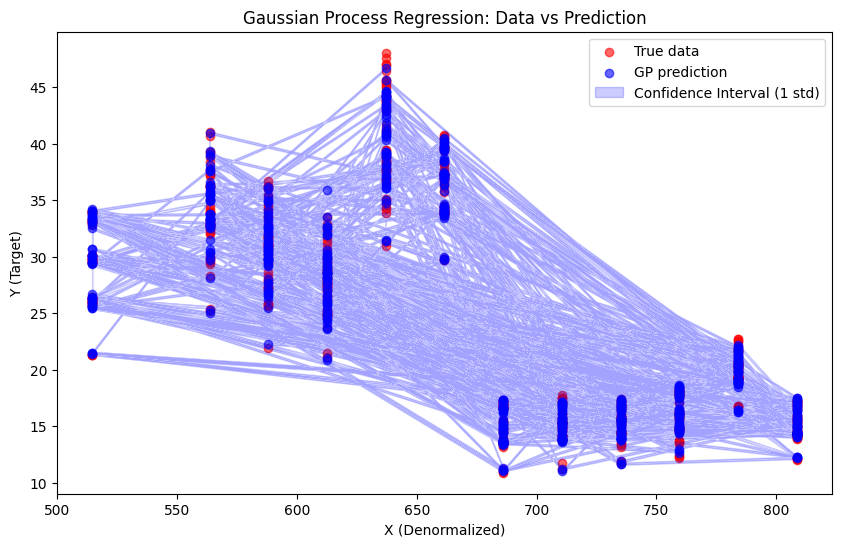

In [12]:
import matplotlib.pyplot as plt

# Get predictions and standard deviations from the Gaussian Process
y_pred, sigma = gpr.predict(X_train, return_std=True)

# Denormalize the predicted values (y_pred) and the standard deviation for confidence intervals
sigma_y1_denorm = sigma * scaler.scale_[0]  # Denormalize standard deviation

# Denormalize the X values for the plot (using the same scaler that was used to normalize X_train)
X_train_denorm = scaler.inverse_transform(X_train)  # Assuming scaler_x was used for X_train

# Create the plot
plt.figure(figsize=(10, 6))

# Choose the index for X and Y to plot
x_idx = 1  # Feature index for the x-axis
y_idx = 1  # Feature index for the y-axis (target)

# Scatter plot of the true data (Y_train['Y2']) and predicted data (y_pred_denorm)
plt.scatter(X_train_denorm[:, x_idx], Y_train['Y2'], color='red', label='True data', alpha=0.6)

# Scatter plot of the GP predictions (y_pred_denorm)
plt.scatter(X_train_denorm[:, x_idx], y_pred[:, 1], color='blue', label='GP prediction', alpha=0.6)

# Plot the confidence interval as a shaded region
plt.fill_between(X_train_denorm[:, x_idx],
                 y_pred[:, 1].flatten() - sigma_y1_denorm[:, 1],  # Flattening for 1D array
                 y_pred[:, 1].flatten() + sigma_y1_denorm[:, 1],  # Flattening for 1D array
                 color='blue', alpha=0.2, label='Confidence Interval (1 std)')

# Labeling and formatting the plot
plt.xlabel('X (Denormalized)')
plt.ylabel('Y (Target)')
plt.title('Gaussian Process Regression: Data vs Prediction')
plt.legend()

# Show plot
plt.show()

Plotting test data

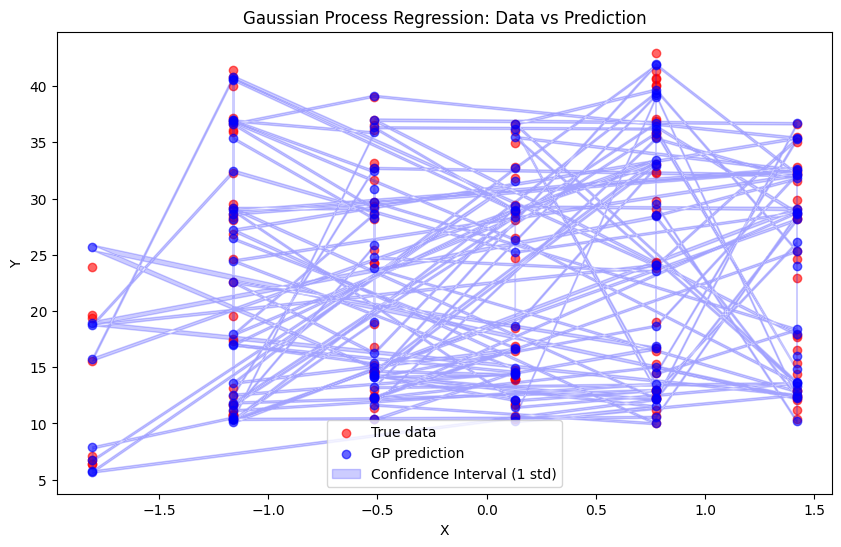

In [13]:
y_pred, sigma = gpr.predict(X_test, return_std=True)

sigma_y1 = sigma[:, 0]

sigma_y1_denorm = sigma_y1 * scaler.scale_[0]  # Adjusting by the scale factor of the target variable

plt.figure(figsize=(10, 6))

plt.scatter(X_test[:, 7], Y_test['Y1'], color='red', label='True data', alpha=0.6)

plt.scatter(X_test[:, 7], y_pred[:, 0], color='blue', label='GP prediction', alpha=0.6)

plt.fill_between(X_test[:, 7],
                 y_pred[:, 0] - sigma_y1_denorm,
                 y_pred[:, 0] + sigma_y1_denorm,
                 color='blue', alpha=0.2, label='Confidence Interval (1 std)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Process Regression: Data vs Prediction')
plt.legend()

# Show plot
plt.show()

Let's now build a neural network in PyTorch to do the same thing!

Ours will be a very simple neural network, to avoid overfitting.

It has an input layer, and a hidden layer. This will require two linear layers.

Its activation function will be the Rectified Linear Unit (ReLU), and it will adjust parameters using Stochastic Gradient Descent (SGD).

Additionally, the SGD will be optimized using the Nesterov Accelerated Gradient algorithm, which is one of the consistently fastest algorithms.

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class PowerNetwork(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
      super(PowerNetwork, self).__init__()
      self.fc1 = nn.Linear(input_dim, hidden_dim)
      self.fc2 = nn.Linear(hidden_dim, output_dim)
      self.activation = nn.ReLU()

  def forward(self, x):
      x = self.fc1(x)
      x = self.activation(x)
      x = self.fc2(x)
      return x

X_train_torch = torch.tensor(X_train, dtype=torch.float32) # z-score normalization spit out a numpy array
Y_train_torch = torch.tensor(Y_train.to_numpy(), dtype=torch.float32) # was not converted to numpy by norm
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
Y_test_torch = torch.tensor(Y_test.to_numpy(), dtype=torch.float32)

train_data = TensorDataset(X_train_torch, Y_train_torch)
test_data = TensorDataset(X_test_torch, Y_test_torch)

test_loader = DataLoader(test_data, batch_size=32, shuffle=True)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

input_dim = X_train.shape[1]
hidden_dim = 50
output_dim = Y_train.shape[1]

model = PowerNetwork(input_dim, hidden_dim, output_dim)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)

The neural network's loss function is decided by Mean Squared Error, as it is a regression problem, not classification.

In [48]:
import torch.nn.functional as F
criterion = nn.MSELoss()

num_epochs = 150

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Iterate through the data
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass (compute gradients)
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} has loss of {running_loss}")

print("finished training")

Epoch 0 has loss of 27.079764187335968
Epoch 10 has loss of 22.259616553783417
Epoch 20 has loss of 22.263280987739563
Epoch 30 has loss of 18.32333552837372
Epoch 40 has loss of 32.557684779167175
Epoch 50 has loss of 26.150923192501068
Epoch 60 has loss of 17.883822977542877
Epoch 70 has loss of 23.053330302238464
Epoch 80 has loss of 21.570135295391083
Epoch 90 has loss of 23.11737686395645
Epoch 100 has loss of 19.397839784622192
Epoch 110 has loss of 14.266871988773346
Epoch 120 has loss of 19.646646827459335
Epoch 130 has loss of 28.614393144845963
Epoch 140 has loss of 22.296903669834137
finished training


Once we have trained this regression neural network, let's now evaluate it's $R^2$ score on the training set.

In [49]:
total_ss_res = 0  # Residual sum of squares
total_ss_tot = 0  # Total sum of squares
y_mean = Y_train_torch.mean(dim=0)  # Mean of actual values
total_samples = 0

# Disable gradient calculation for testing
with torch.no_grad():
    for inputs, labels in train_loader:
        predictions = model(inputs)

        # Sum of squared residuals (SS_res)
        ss_res = ((labels - predictions) ** 2).sum().item()

        # Total sum of squares (SS_tot)
        ss_tot = ((labels - y_mean) ** 2).sum().item()

        total_ss_res += ss_res
        total_ss_tot += ss_tot
        total_samples += inputs.size(0)

# Compute R^2
r2_score = 1 - (total_ss_res / total_ss_tot)
print("R^2 Score:", r2_score)

R^2 Score: 0.9905175921713665


We will now do the same score evaluation on the test set.

In [50]:
total_ss_res = 0  # Residual sum of squares
total_ss_tot = 0  # Total sum of squares
y_mean = Y_test_torch.mean(dim=0)  # Mean of actual values
total_samples = 0

# Disable gradient calculation for testing
with torch.no_grad():
    for inputs, labels in test_loader:
        predictions = model(inputs)

        # Sum of squared residuals (SS_res)
        ss_res = ((labels - predictions) ** 2).sum().item()

        # Total sum of squares (SS_tot)
        ss_tot = ((labels - y_mean) ** 2).sum().item()

        total_ss_res += ss_res
        total_ss_tot += ss_tot
        total_samples += inputs.size(0)

# Compute R^2
r2_score = 1 - (total_ss_res / total_ss_tot)
print("R^2 Score:", r2_score)

R^2 Score: 0.9884329700566522


You can observe right here that the neural network achieved low bias & low variance!

---


## Conclusion

Both Gaussian Process (GP) regression & a vanilla neural network were able to predict the energy usage with high accuracy.

Both required an amount of hyperparameter tuning, although the GP regressor contained features to auto-tune kernel inputs using the [Limited-memory BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS) algorithm, a powerful & popular optimization technique.

## Next Steps

To fully, 110% understand the algorithms behind it, I will implement the GP regressor from scratch, when time permits. Stay tuned!